In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.interactive('True')

In [4]:
from scipy.integrate import odeint

In [6]:
# define parameters

A = 1

k1 = 2
k2 = 1
k2M = 1
k3 = 1
k3M = 0
k4 = 1
k4M = 1
k5 = 1
k5M = 0
k6 = 1
k6M = 1


In [7]:
# define differential equations

def BR_rates(y,A,k1,k2,k2M,k3,k3M,k4,k4M,k5,k5M,k6,k6M):
    X1 = y[0]
    X2 = y[1]
    X3 = y[2]
    B = y[3]
    C = y[4]
    
    v1 = k1*A
    v2 = k2*X1 - k2M*X2
    v3 = k3*X2 - k3M*B
    v4 = k4*X1 - k4M*X3
    v5 = k5*X3 - k5M*C
    v6 = k6*X3 - k6M*X2

    return np.array([v1,v2,v3,v4,v5,v6])

def BR_deq(y,t,A,k1,k2,k2M,k3,k3M,k4,k4M,k5,k5M,k6,k6M):

    v = BR_rates(y,A,k1,k2,k2M,k3,k3M,k4,k4M,k5,k5M,k6,k6M)
    dX1dt = v[0] - v[1] - v[3]
    dX2dt = v[1] - v[2] + v[5]
    dX3dt = v[3] - v[4] - v[5]
    dBdt = v[2]
    dCdt = v[4]
    
    dydt = np.array([dX1dt,dX2dt,dX3dt,dBdt,dCdt])
    
    return dydt

In [8]:
# define times at which we want the solution

T = np.linspace(0,10,500)

In [14]:
T

array([  0.        ,   0.02004008,   0.04008016,   0.06012024,
         0.08016032,   0.1002004 ,   0.12024048,   0.14028056,
         0.16032064,   0.18036072,   0.2004008 ,   0.22044088,
         0.24048096,   0.26052104,   0.28056112,   0.3006012 ,
         0.32064128,   0.34068136,   0.36072144,   0.38076152,
         0.4008016 ,   0.42084168,   0.44088176,   0.46092184,
         0.48096192,   0.501002  ,   0.52104208,   0.54108216,
         0.56112224,   0.58116232,   0.6012024 ,   0.62124248,
         0.64128257,   0.66132265,   0.68136273,   0.70140281,
         0.72144289,   0.74148297,   0.76152305,   0.78156313,
         0.80160321,   0.82164329,   0.84168337,   0.86172345,
         0.88176353,   0.90180361,   0.92184369,   0.94188377,
         0.96192385,   0.98196393,   1.00200401,   1.02204409,
         1.04208417,   1.06212425,   1.08216433,   1.10220441,
         1.12224449,   1.14228457,   1.16232465,   1.18236473,
         1.20240481,   1.22244489,   1.24248497,   1.26

In [9]:
# define initial values

y0 = np.zeros(5)

In [10]:
y0

array([ 0.,  0.,  0.,  0.,  0.])

In [11]:
Y = odeint(BR_deq,y0,T,args=(A,k1,k2,k2M,k3,k3M,k4,k4M,k5,k5M,k6,k6M))

In [12]:
Y.shape

(500, 5)

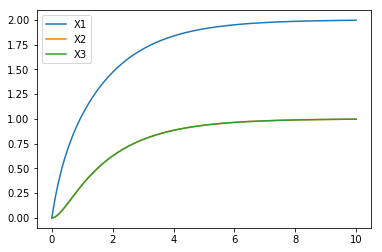

In [13]:
plt.clf()
plt.plot(T,Y[:,0:3])
plt.legend(['X1','X2','X3'])

In [55]:
plt.draw()

In [56]:
plt.figure()

In [69]:
# calculate all the rates

V = np.vstack([BR_rates(Y[i,:],A,k1,k2,k2M,k3,k3M,k4,k4M,k5,k5M,k6,k6M) for i in range(len(T))])

In [70]:
V.shape

(500, 6)

In [76]:
plt.clf()
plt.plot(T,V[:,0:3])
plt.legend(['v1','v2','v3'])
plt.axis([0,10,0,2.1])

[0, 10, 0, 2.1]

In [77]:
plt.draw()

In [15]:
import scipy.optimize as opt

In [18]:
opt.root(BR_deq,np.ones(5))

TypeError: BR_deq() takes exactly 14 arguments (1 given)

In [17]:
help(opt.root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver.  Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <opti